<a href="https://colab.research.google.com/github/tmogoa/compilerconstruction/blob/main/Compiler_Construction_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Group members: 116814,***

# **Lab 1: Flex, Bison, Lex, Yacc**

### Flex

Flex is ...

### Bison

Bison is a general purpose parser(syntatic analyzer) generator which is published as part of the GNU project. Bison converts an annotated context-free grammar into a LR of generalized LR parser (GNU, 2021). *'LR'* refers to Left-to-right scanning Right-most derivation in reverse (Javatpoint, 2022). Additionally Bison is compatible with YACC, that is all correcly written YACC grammars can work with Bison (GNU, 2021). Bison is the GNU equivalent of YACC (MVPS.net, 2019).

The diagram below by Gao(2022) shows summary of how Bison works, how a parser is generated and how it is then compiled by a C compiler afterwhich in can be use to generate syntax trees.

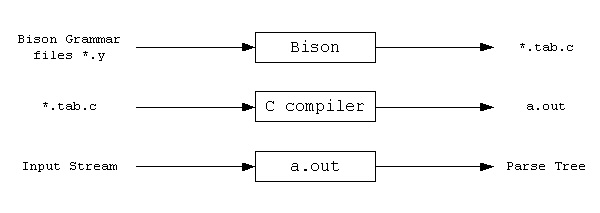

Below is a code snippet of a simple calculator program (Levine, 2009):

    /* simplest version of calculator */
    %{
    #include <stdio.h>
    %}

    /* declare tokens */
    %token NUMBER
    %token ADD SUB MUL DIV ABS
    %token EOL

    %%

    calclist: /* nothing */                       matches at beginning of input
    | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
    ;

    exp: factor       default $$ = $1 
    | exp ADD factor { $$ = $1 + $3; }
    | exp SUB factor { $$ = $1 - $3; }
    ;

    factor: term       default $$ = $1 
    | factor MUL term { $$ = $1 * $3; }
    | factor DIV term { $$ = $1 / $3; }
    ;

    term: NUMBER  default $$ = $1 
    | ABS term   { $$ = $2 >= 0? $2 : - $2; }
    ;
    %%
    main(int argc, char **argv)
    {
      yyparse();
    }

    yyerror(char *s)
    {
      fprintf(stderr, "error: %s\n", s);
    }


### Lex

Lex is ...

### YACC

YACC is ...

###***References***

1. https://www.gnu.org/software/bison/manual/bison.html#Introduction

2. https://www.mvps.net/docs/gnu-flex-and-gnu-bison/?gclid=Cj0KCQjw08aYBhDlARIsAA_gb0ffbLtKYZnJzLZK2e-h5vYq_KEuofSSnNiZMAKjXUazI5KPEOghmqoaAkNUEALw_wcB

3. https://www.javatpoint.com/lr-parser

4. Gao Lan, http://alumni.cs.ucr.edu/~lgao/teaching/bison.html

5. Levine, J. (2009). Flex & Bison: Text Processing Tools. " O'Reilly Media, Inc.".